In [ ]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Summer Research/Data/model_data.csv')

In [ ]:
x = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
x = x.iloc[:, 1:]
y = model_data.A

In [ ]:
x.head()

,FTAG,HTHG,HTAG,D,E,F,HST,HF,AF,AC,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBA,IWH,LBH,LBD,LBA,SBH,SBD,WHH,WHD,WHA,SJD,SJA,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,2.0,2.0,2.0,0,0,1,2.0,14.0,16.0,8.0,0.0,0.0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.10,2.1,2.10,3.00,3.20,2.20,3.2,2.20,3.2,2.80,3.25,3.40,3.25,3.10,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84
1,2.0,0.0,1.0,0,1,0,5.0,15.0,14.0,6.0,0.0,0.0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,1.83,3.8,3.75,3.20,1.83,4.33,3.6,4.33,3.2,1.72,3.25,1.83,3.30,1.80,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86
2,0.0,0.0,0.0,0,0,1,7.0,12.0,13.0,6.0,0.0,0.0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,2.95,2.2,2.25,3.00,2.88,2.30,3.2,2.30,3.2,2.62,3.20,3.00,3.25,2.80,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05
3,0.0,0.0,0.0,0,0,1,8.0,13.0,11.0,6.0,0.0,0.0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,4.75,1.7,1.67,3.25,4.50,1.70,3.4,1.70,3.3,4.33,3.25,5.00,3.25,5.00,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76
4,0.0,0.0,0.0,0,0,1,2.0,17.0,11.0,0.0,1.0,0.0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,2.45,2.5,2.75,3.10,2.30,2.70,3.2,2.75,3.1,2.30,3.20,2.38,3.25,2.35,56.0,3.30,2.81,3.35,3.17,2.50,2.35,36.0,2.23,2.02,1.80,1.71,21.0,0.25,1.89,1.86,2.04,2.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
logistic_regression = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
y_train_predict = logistic_regression.predict(x_train)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentageaccuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

81.0704960835509

In [ ]:
accuracy = metrics.accuracy_score(y_train, y_train_predict)
accuracy_percentage = 100 * accuracy
accuracy_percentageaccuracy = metrics.accuracy_score(y_train, y_train_predict)
accuracy_percentage = 100 * accuracy
accuracy_percentage

82.85714285714286

In [ ]:
x = x.astype(float) 
y = y.astype(float) 
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.347597
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.498    
Dependent Variable: A                AIC:              1875.4387
Date:               2020-07-01 18:23 BIC:              2173.4949
No. Observations:   2551             Log-Likelihood:   -886.72  
Df Model:           50               LL-Null:          -1765.0  
Df Residuals:       2500             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
-----------------------------------------------------------------
FTAG       -2.0191    0.1156  -17.4624  0.0000   -2.2457  -1.7925
HTHG        1.9886    0.3089    6.4388  0.0000    1.3833   2.5940
HTAG    

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       383
           1       0.82      0.83      0.82       383

    accuracy                           0.82       766
   macro avg       0.82      0.82      0.82       766
weighted avg       0.82      0.82      0.82       766



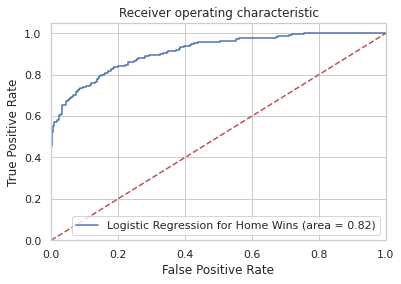

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression for Home Wins (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
x1 = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
x1= x1.iloc[:, 1:]
y1 = model_data.B

In [ ]:
x1

,FTAG,HTHG,HTAG,D,E,F,HST,HF,AF,AC,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBA,IWH,LBH,LBD,LBA,SBH,SBD,WHH,WHD,WHA,SJD,SJA,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,2.0,2.0,2.0,0,0,1,2.0,14.0,16.0,8.0,0.0,0.0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.10,2.10,2.10,3.00,3.20,2.20,3.200,2.20,3.20,2.80,3.25,3.40,3.25,3.10,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84
1,2.0,0.0,1.0,0,1,0,5.0,15.0,14.0,6.0,0.0,0.0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,1.83,3.80,3.75,3.20,1.83,4.33,3.600,4.33,3.20,1.72,3.25,1.83,3.30,1.80,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86
2,0.0,0.0,0.0,0,0,1,7.0,12.0,13.0,6.0,0.0,0.0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,2.95,2.20,2.25,3.00,2.88,2.30,3.200,2.30,3.20,2.62,3.20,3.00,3.25,2.80,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05
3,0.0,0.0,0.0,0,0,1,8.0,13.0,11.0,6.0,0.0,0.0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,4.75,1.70,1.67,3.25,4.50,1.70,3.400,1.70,3.30,4.33,3.25,5.00,3.25,5.00,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76
4,0.0,0.0,0.0,0,0,1,2.0,17.0,11.0,0.0,1.0,0.0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,2.45,2.50,2.75,3.10,2.30,2.70,3.200,2.75,3.10,2.30,3.20,2.38,3.25,2.35,56.0,3.30,2.81,3.35,3.17,2.50,2.35,36.0,2.23,2.02,1.80,1.71,21.0,0.25,1.89,1.86,2.04,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1.0,0.0,1.0,0,1,0,5.0,14.0,11.0,9.0,0.0,0.0,7.00,4.50,1.44,6.75,4.60,1.42,7.00,1.40,6.00,7.50,4.50,1.40,7.00,4.600,7.00,4.33,1.44,4.80,1.40,4.80,1.44,39.0,8.30,7.23,4.90,4.51,1.47,1.43,29.0,1.67,1.60,2.43,2.27,20.0,1.25,1.95,1.89,2.03,1.97
2547,0.0,0.0,0.0,0,0,1,8.0,5.0,5.0,5.0,0.0,0.0,3.40,3.50,2.10,3.30,3.60,2.05,3.25,2.10,3.00,3.40,3.40,2.00,3.25,3.500,3.40,3.30,2.15,3.50,2.10,3.60,2.10,39.0,3.66,3.38,3.72,3.45,2.20,2.10,33.0,1.77,1.71,2.24,2.11,20.0,0.25,2.13,2.06,1.84,1.81
2548,0.0,1.0,0.0,1,0,0,9.0,8.0,12.0,3.0,0.0,0.0,1.40,4.50,8.50,1.40,4.40,7.75,1.40,7.00,1.37,1.40,4.50,7.50,1.40,4.333,1.40,4.20,9.00,4.50,7.50,5.00,9.00,39.0,1.41,1.40,5.07,4.55,9.10,8.04,32.0,1.68,1.63,2.45,2.23,18.0,-1.25,1.93,1.90,2.02,1.97
2549,3.0,2.0,2.0,0,0,1,8.0,12.0,10.0,5.0,0.0,0.0,5.00,4.00,1.67,5.00,4.00,1.62,5.00,1.65,5.40,4.50,3.75,1.70,5.00,3.750,5.00,3.60,1.70,4.00,1.67,4.20,1.67,39.0,5.60,5.02,4.28,3.93,1.70,1.65,29.0,1.67,1.58,2.50,2.31,18.0,0.75,2.14,2.08,1.85,1.81


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=4)
logistic_regression1 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logistic_regression1.fit(x1_train,y1_train)
y1_pred = logistic_regression1.predict(x1_test)
y1_train_predict = logistic_regression1.predict(x1_train)

In [ ]:
accuracy = metrics.accuracy_score(y1_test, y1_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

87.0757180156658

In [ ]:
accuracy = metrics.accuracy_score(y1_train, y1_train_predict)
accuracy_percentage = 100 * accuracy
accuracy_percentage

89.29971988795519

In [ ]:
x1 = x1.astype(float) 
y1 = y1.astype(float) 
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.225297
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.615    
Dependent Variable: B                AIC:              1259.4666
Date:               2020-06-29 19:22 BIC:              1580.8998
No. Observations:   2551             Log-Likelihood:   -574.73  
Df Model:           54               LL-Null:          -1494.1  
Df Residuals:       2496             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
-----------------------------------------------------------------
FTAG        2.6151    0.1433   18.2458  0.0000    2.3342   2.8961
HTHG       -2.7487    0.2282  -12.0475  0.0000   -3.1958  -2.3015
HTAG    

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       564
           1       0.70      0.89      0.78       202

    accuracy                           0.87       766
   macro avg       0.83      0.88      0.85       766
weighted avg       0.89      0.87      0.88       766



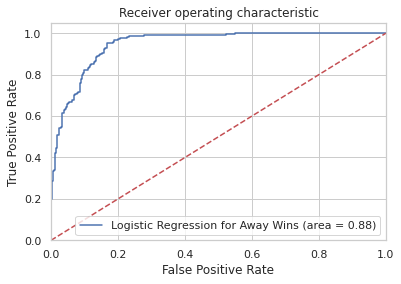

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y1_test, logistic_regression1.predict(x1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logistic_regression1.predict_proba(x1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression for Away Wins (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
x2 = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
x2 = x2.iloc[:, 1:]
y2 = model_data.C

In [ ]:
x2

,Unnamed: 0,FTAG,HTHG,HTAG,D,HS,AS,HST,AST,HF,AF,AC,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCD,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,0,2.0,2.0,2.0,0,3.0,13.0,2.0,6.0,14.0,16.0,8.0,0.0,0.0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.20,3.10,2.10,3.0,2.10,3.00,3.20,2.20,3.200,3.20,2.20,3.20,2.80,2.00,3.25,3.40,3.25,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84
1,1,2.0,0.0,1.0,0,10.0,12.0,5.0,5.0,15.0,14.0,6.0,0.0,0.0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,3.40,1.83,3.80,3.1,3.75,3.20,1.83,4.33,3.600,1.75,4.33,3.20,1.72,4.00,3.25,1.83,3.30,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86
2,2,0.0,0.0,0.0,0,15.0,7.0,7.0,4.0,12.0,13.0,6.0,0.0,0.0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,3.30,2.95,2.20,3.0,2.25,3.00,2.88,2.30,3.200,3.00,2.30,3.20,2.62,2.20,3.20,3.00,3.25,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05
3,3,0.0,0.0,0.0,0,15.0,13.0,8.0,3.0,13.0,11.0,6.0,0.0,0.0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,3.45,4.75,1.70,3.2,1.67,3.25,4.50,1.70,3.400,5.00,1.70,3.30,4.33,1.67,3.25,5.00,3.25,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76
4,4,0.0,0.0,0.0,0,4.0,16.0,2.0,7.0,17.0,11.0,0.0,1.0,0.0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,3.30,2.45,2.50,3.0,2.75,3.10,2.30,2.70,3.200,2.50,2.75,3.10,2.30,2.75,3.20,2.38,3.25,56.0,3.30,2.81,3.35,3.17,2.50,2.35,36.0,2.23,2.02,1.80,1.71,21.0,0.25,1.89,1.86,2.04,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,375,1.0,0.0,1.0,0,6.0,17.0,5.0,9.0,14.0,11.0,9.0,0.0,0.0,7.00,4.50,1.44,6.75,4.60,1.42,7.00,4.50,1.40,6.00,4.0,7.50,4.50,1.40,7.00,4.600,1.40,7.00,4.33,1.44,7.50,4.80,1.40,4.80,39.0,8.30,7.23,4.90,4.51,1.47,1.43,29.0,1.67,1.60,2.43,2.27,20.0,1.25,1.95,1.89,2.03,1.97
2547,376,0.0,0.0,0.0,0,13.0,14.0,8.0,9.0,5.0,5.0,5.0,0.0,0.0,3.40,3.50,2.10,3.30,3.60,2.05,3.25,3.30,2.10,3.00,3.2,3.40,3.40,2.00,3.25,3.500,2.10,3.40,3.30,2.15,3.25,3.50,2.10,3.60,39.0,3.66,3.38,3.72,3.45,2.20,2.10,33.0,1.77,1.71,2.24,2.11,20.0,0.25,2.13,2.06,1.84,1.81
2548,377,0.0,1.0,0.0,1,15.0,10.0,9.0,7.0,8.0,12.0,3.0,0.0,0.0,1.40,4.50,8.50,1.40,4.40,7.75,1.40,4.50,7.00,1.37,4.4,1.40,4.50,7.50,1.40,4.333,8.00,1.40,4.20,9.00,1.40,4.50,7.50,5.00,39.0,1.41,1.40,5.07,4.55,9.10,8.04,32.0,1.68,1.63,2.45,2.23,18.0,-1.25,1.93,1.90,2.02,1.97
2549,378,3.0,2.0,2.0,0,12.0,12.0,8.0,8.0,12.0,10.0,5.0,0.0,0.0,5.00,4.00,1.67,5.00,4.00,1.62,5.00,3.75,1.65,5.40,3.6,4.50,3.75,1.70,5.00,3.750,1.65,5.00,3.60,1.70,5.00,4.00,1.67,4.20,39.0,5.60,5.02,4.28,3.93,1.70,1.65,29.0,1.67,1.58,2.50,2.31,18.0,0.75,2.14,2.08,1.85,1.81


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=4)
logistic_regression2 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logistic_regression2.fit(x2_train,y2_train)
y2_pred = logistic_regression2.predict(x2_test)
y2_train_predict = logistic_regression2.predict(x2_train)

In [ ]:
accuracy = metrics.accuracy_score(y2_test, y2_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

65.0130548302872

In [ ]:
accuracy = metrics.accuracy_score(y2_train, y2_train_predict)
accuracy_percentage = 100 * accuracy
accuracy_percentage

63.69747899159663

In [ ]:
x2 = x2.astype(float) 
y2 = y2.astype(float) 
import statsmodels.api as sm
logit_model=sm.Logit(y2,x2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.511093
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.096     
Dependent Variable: C                AIC:              2717.5946 
Date:               2020-06-29 19:28 BIC:              3039.0279 
No. Observations:   2551             Log-Likelihood:   -1303.8   
Df Model:           54               LL-Null:          -1442.4   
Df Residuals:       2496             LLR p-value:      9.2436e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
FTAG          -0.1583    0.0665  -2.3817  0.0172  -0.2887  -0.0280
HTHG           0.1066    0.1085   0.9826  0.3258  -0.1061   0.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73       585
           1       0.35      0.61      0.44       181

    accuracy                           0.64       766
   macro avg       0.59      0.63      0.59       766
weighted avg       0.72      0.64      0.66       766



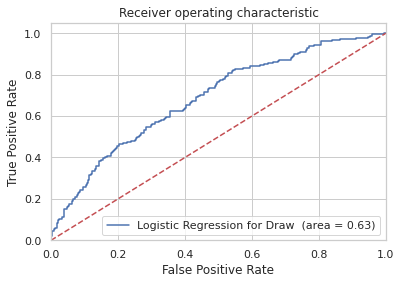

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y2_test, logistic_regression2.predict(x2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logistic_regression2.predict_proba(x2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression for Draw  (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
print(x.columns)

Index(['Unnamed: 0', 'FTAG', 'HTHG', 'HTAG', 'D', 'E', 'F', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],
      dtype='object')


In [ ]:
x = model_data.drop(['A', 'B', 'C', 'FTHG'],axis = 1)
y = model_data.A

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
rfe = RFE(logreg, 10, step=1)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False False False False False False False False
 False False False False False  True  True False False False False False
 False  True False False  True False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False  True False  True False False False
 False False False False]
[55  1  1 22 19 23  3 30 41 24 40 46 53 34 39 36 38  1  1 18  7 48 13 28
 14  1  8 20  1 35 27  1 31 33 47  1 43 10 15 16 32  2 44 37 29 17 49 54
 12  6  9 21 45 52  1 42  1 11 50 25  5  4 51 26]


In [ ]:
x = model_data.drop(['A', 'B', 'C', 'FTHG'],axis = 1)
y = model_data.A
x1 = model_data.drop(['A', 'B', 'C', 'FTHG'],axis = 1)
y1 = model_data.B
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

logreg_model = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logreg_model_1 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
rfecv = RFECV(estimator=logreg_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv_1 = RFECV(estimator=logreg_model_1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x, y)
rfecv_1.fit(x1, y1)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='ovr', n_jobs=None, penalty='l2',
                                   random_state=None, solver='newton-cg',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))
print('Optimal number of features: {}'.format(rfecv_1.n_features_))

Optimal number of features: 47
Optimal number of features: 46


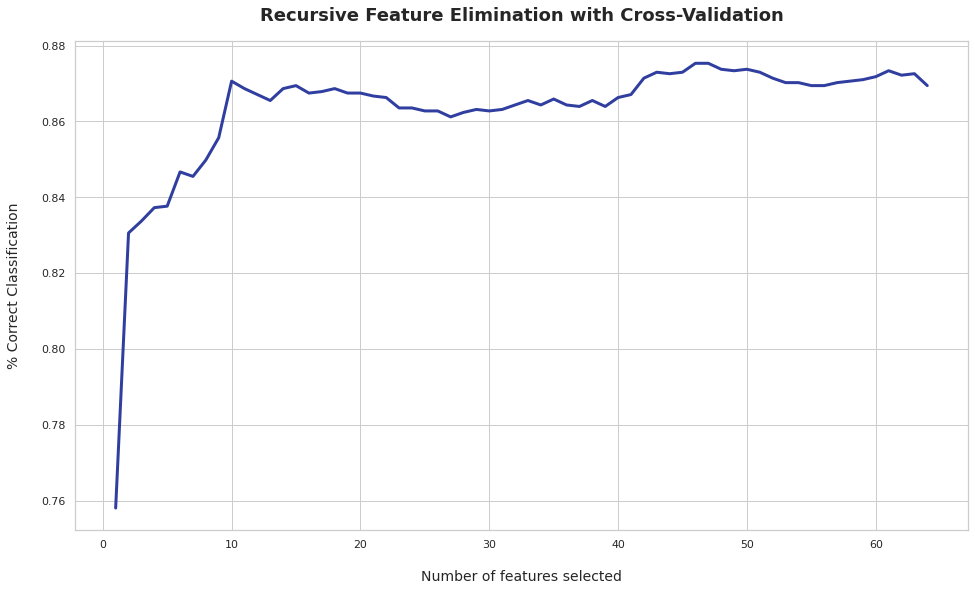

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
rfecv.grid_scores_

array([0.75818042, 0.83063812, 0.83377537, 0.83730632, 0.83769617,
       0.84671501, 0.84553624, 0.84984767, 0.85573002, 0.87062354,
       0.86866199, 0.86709259, 0.86552396, 0.86866199, 0.8694463 ,
       0.86748475, 0.86787844, 0.86866352, 0.86748705, 0.86748782,
       0.86670197, 0.86630904, 0.86356471, 0.86356395, 0.86277963,
       0.8627804 , 0.86121177, 0.86238824, 0.86317332, 0.86278117,
       0.86317256, 0.86434979, 0.86552627, 0.86434979, 0.86591842,
       0.86435133, 0.86395917, 0.8655278 , 0.86395994, 0.86631211,
       0.86709566, 0.87141015, 0.87297648, 0.87258432, 0.87297648,
       0.87532712, 0.87532712, 0.87375772, 0.87336557, 0.87375772,
       0.87297341, 0.87141015, 0.87023445, 0.87023445, 0.86945014,
       0.86945014, 0.87023522, 0.87062737, 0.87101953, 0.87180384,
       0.8733717 , 0.872196  , 0.87258816, 0.86945167])

In [ ]:
g_scores = rfecv.grid_scores_
indices = np.argsort(g_scores)[::-1]
print('Printing RFECV results:')
for f in range(x.shape[1]):
    print("%d. Number of features: %d; Grid_Score: %f" % (f + 1, indices[f]+1, g_scores[indices[f]]))

Printing RFECV results:
1. Number of features: 46; Grid_Score: 0.875327
2. Number of features: 47; Grid_Score: 0.875327
3. Number of features: 48; Grid_Score: 0.873758
4. Number of features: 50; Grid_Score: 0.873758
5. Number of features: 61; Grid_Score: 0.873372
6. Number of features: 49; Grid_Score: 0.873366
7. Number of features: 43; Grid_Score: 0.872976
8. Number of features: 45; Grid_Score: 0.872976
9. Number of features: 51; Grid_Score: 0.872973
10. Number of features: 63; Grid_Score: 0.872588
11. Number of features: 44; Grid_Score: 0.872584
12. Number of features: 62; Grid_Score: 0.872196
13. Number of features: 60; Grid_Score: 0.871804
14. Number of features: 52; Grid_Score: 0.871410
15. Number of features: 42; Grid_Score: 0.871410
16. Number of features: 59; Grid_Score: 0.871020
17. Number of features: 58; Grid_Score: 0.870627
18. Number of features: 10; Grid_Score: 0.870624
19. Number of features: 57; Grid_Score: 0.870235
20. Number of features: 53; Grid_Score: 0.870234
21. N

In [ ]:
print(rfecv.support_)
print(rfecv.ranking_)

[False  True  True  True  True  True  True  True False  True False False
 False  True False  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True False  True  True  True False False
  True  True  True  True False False  True False  True  True False  True
  True  True False  True]
[18  1  1  1  1  1  1  1  4  1  3  9 16  1  2  1  1  1  1  1  1 11  1  1
  1  1  1  1  1  1  1  1  1  1 10  1  6  1  1  1  1  1  7  1  1  1 12 17
  1  1  1  1  8 15  1  5  1  1 13  1  1  1 14  1]


In [ ]:
print(rfecv_1.support_)
print(rfecv_1.ranking_)

[False  True  True  True  True  True False  True  True  True  True False
 False False False  True  True  True  True False  True False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True  True False  True
  True False False  True  True False  True  True  True  True False  True
 False  True False  True]
[19  1  1  1  1  1  9  1  1  1  1  8 18  6 11  1  1  1  1  3  1 16  1  1
  1  1  1 15  1  1  1  1  1  1  1  1  1  1  1 13  1  1 17  1  1  1  5  1
  1 10  7  1  1  4  1  1  1  1 14  1 12  1  2  1]


In [ ]:
rfecv_support_array=[]
rfecv_1_support_array=[]
for i in range(0,64):
    if rfecv.support_[i] == 'False':
        rfecv_support_array.append('1')
    elif rfecv.support_[i] == 'True':
        rfecv_support_array.append('0')
for i in range(0,64):
  if rfecv_1.support_[i] == 'False':
    rfecv_1_support_array.append('1')
  elif rfecv_1.support_[i] == 'True':
    rfecv_1_support_array.append('0')

In [ ]:
rfecv_support_array

[]

In [ ]:
FF = list(x.columns.values.tolist())
for i in range(len(FF)):
  print(i,end=" ")
  print(FF[i])

0 Unnamed: 0
1 FTAG
2 HTHG
3 HTAG
4 D
5 E
6 F
7 HS
8 AS
9 HST
10 AST
11 HF
12 AF
13 HC
14 AC
15 HY
16 AY
17 HR
18 AR
19 B365H
20 B365D
21 B365A
22 BWH
23 BWD
24 BWA
25 GBH
26 GBD
27 GBA
28 IWH
29 IWD
30 IWA
31 LBH
32 LBD
33 LBA
34 SBH
35 SBD
36 SBA
37 WHH
38 WHD
39 WHA
40 SJH
41 SJD
42 SJA
43 VCH
44 VCD
45 VCA
46 Bb1X2
47 BbMxH
48 BbAvH
49 BbMxD
50 BbAvD
51 BbMxA
52 BbAvA
53 BbOU
54 BbMx>2.5
55 BbAv>2.5
56 BbMx<2.5
57 BbAv<2.5
58 BbAH
59 BbAHh
60 BbMxAHH
61 BbAvAHH
62 BbMxAHA
63 BbAvAHA


In [ ]:
print(np.where(rfecv.support_ == False)[0])
x.drop(x.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  8 10 11 12 14 21 34 36 42 46 47 52 53 55 58 62]


IndexError: ignored

In [ ]:
len(x.columns)

47

In [ ]:
importance_array=[]
importance_array=[(np.absolute(rfecv.estimator_.coef_))]
importance_array = np.reshape(importance_array,(47,1))
importance_array

array([[1.95935036],
       [1.75378424],
       [0.19269361],
       [0.38874366],
       [0.14632958],
       [0.24244054],
       [0.08278448],
       [0.27066217],
       [0.06679599],
       [0.0635786 ],
       [0.03381155],
       [0.7146516 ],
       [0.57012765],
       [0.17638582],
       [0.32847251],
       [0.36663718],
       [0.1456743 ],
       [0.26603017],
       [0.30697165],
       [0.28711688],
       [0.1842602 ],
       [0.17128122],
       [0.08801925],
       [0.07854637],
       [0.61436271],
       [0.19134668],
       [0.09943328],
       [0.14204409],
       [0.2457527 ],
       [0.42171523],
       [0.13640964],
       [0.10566396],
       [0.47222303],
       [0.04070596],
       [0.08917292],
       [0.26810996],
       [0.28629683],
       [0.40445194],
       [0.40240978],
       [0.20248219],
       [0.58789869],
       [0.42303325],
       [0.34273123],
       [0.15776969],
       [0.45885186],
       [0.58856798],
       [0.09917139]])

In [ ]:
len(importance_array)

47

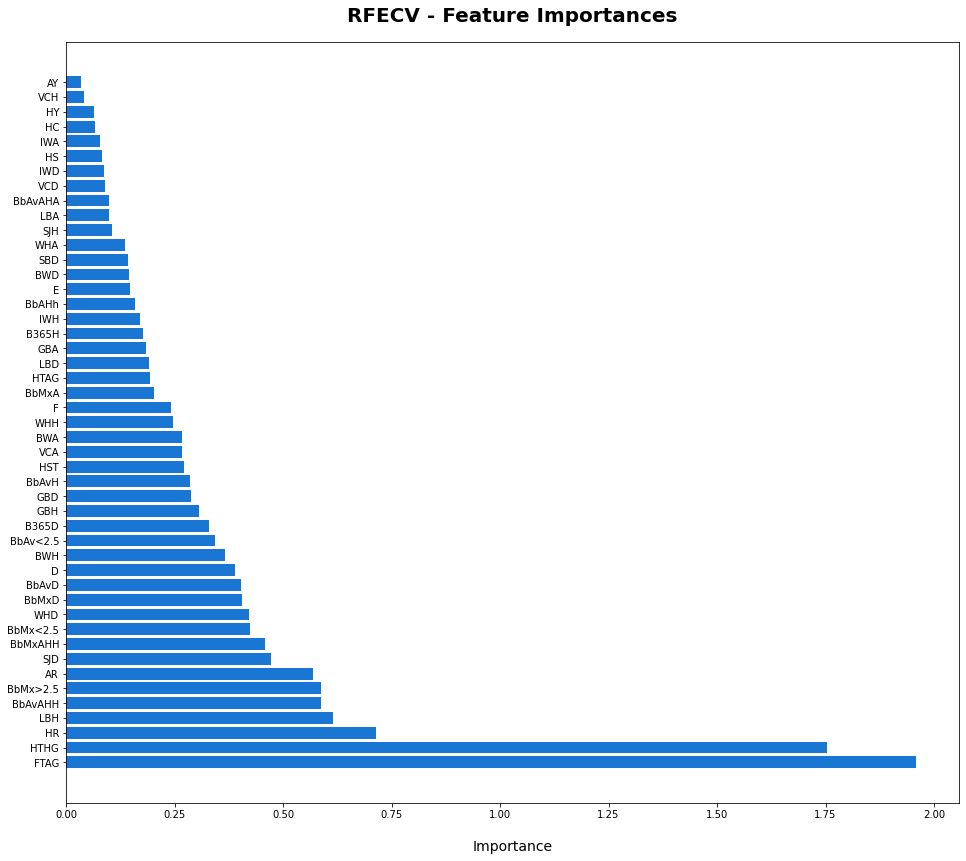

In [ ]:
dset = pd.DataFrame()
dset['attr'] = x.columns
dset['importance'] = importance_array

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
model_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Summer Research/Data/model_data.csv')
col_name_A1= ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
#col_name_A2 = ['a5', 'a6', 'a7', 'a8', 'a9']
col_name_B1= ['b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9']
#col_name_B2 = ['b5', 'b6', 'b7', 'b8', 'b9']
col_name_C1 = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
#col_name_C2 = ['c5', 'c6', 'c7', 'c8', 'c9']
#model_data1 = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
# Data For Model A
x = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
x = x.iloc[:, 1:]
y = model_data.A
# Data for Model B
x1 = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA','AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
x1 = x1.iloc[:, 1:]
y1 = model_data.B
# Data for model C
x2 = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
x2 = x2.iloc[:, 1:]
y2 = model_data.C

for i in range(0,10):
    # For model A
    y = model_data.A
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
    logistic_regression = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
    logistic_regression.fit(x_train,y_train)
    y_pred = logistic_regression.predict(x_test)
    y_train_predict = logistic_regression.predict(x_train)
    #for model B
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=4)
    logistic_regression1 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
    logistic_regression1.fit(x1_train,y1_train)
    y1_pred = logistic_regression1.predict(x1_test)
    y1_train_predict = logistic_regression1.predict(x1_train)
    #for model C
    x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=4)
    logistic_regression2 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
    logistic_regression2.fit(x2_train,y2_train)
    y2_pred = logistic_regression2.predict(x2_test)
    y2_train_predict = logistic_regression2.predict(x2_train)
    #from sklearn.preprocessing import MinMaxScaler
    #scaler = MinMaxScaler(feature_range = (0,1))
    #scaler.fit(x5_train)

  ##appending o/p array and adding data to the model
    # For Model A 
    model_data[col_name_A1[i]]=np.append(y_pred, y_train_predict)
    #model_data[col_name_A2[i]]=np.append(y2_pred, y2_train_predict)
    # For Model B 
    model_data[col_name_B1[i]]=np.append(y1_pred, y1_train_predict)
    #model_data[col_name_B2[i]]=np.append(y2_pred, y2_train_predict)
    # fOR MODEL C 
    model_data[col_name_C1[i]]=np.append(y2_pred, y2_train_predict)
    #model_data[col_name_C2[i]]=np.append(y1_pred, y1_train_predict)
  
  ##printing accuracy FOR ALL THE MODELS
    # ACCURACY FOR MODEL A
    accuracy_test = metrics.accuracy_score(y_test, y_pred)
    accuracy_percentage_test = 100 * accuracy_test
    print ("Test data accuracy for model A: ", accuracy_percentage_test)
    accuracy_train = metrics.accuracy_score(y_train, y_train_predict)
    accuracy_percentage_train = 100 * accuracy_train
    print ("Train data Accuracy for model A:",accuracy_percentage_train)
    print (" ")
    # ACCURACY FOR MODEL B
    accuracy_test_1 = metrics.accuracy_score(y1_test, y1_pred)
    accuracy_percentage_test_1 = 100 * accuracy_test_1
    print ("Test data accuracy for model B: ", accuracy_percentage_test_1)
    accuracy_train_1 = metrics.accuracy_score(y1_train, y1_train_predict)
    accuracy_percentage_train_1 = 100 * accuracy_train_1
    print ("Train data Accuracy for model B:",accuracy_percentage_train_1)
    print (" ")
    # ACCURACY FOR MODEL C
    accuracy_test_2 = metrics.accuracy_score(y2_test, y2_pred)
    accuracy_percentage_test_2 = 100 * accuracy_test_2
    print ("Test data accuracy for model C: ",accuracy_percentage_test_2)
    accuracy_train_2 = metrics.accuracy_score(y2_train, y2_train_predict)
    accuracy_percentage_train_2 = 100 * accuracy_train_2
    print ("Train data Accuracy for model C:",accuracy_percentage_train_2)
    print("  ")
    print (" End of cycle:",i)
    # Data For Model A
    #x = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
    #x = x.iloc[:, 1:]
    x[col_name_B1[i]]=model_data[col_name_B1[i]]
    x[col_name_C1[i]]=model_data[col_name_C1[i]]
    #y = model_data.A
    # Data for Model B
    #x1 = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
    #x1 = x1.iloc[:, 1:]
    x1[col_name_A1[i]] = model_data[col_name_A1[i]]
    x1[col_name_C1[i]] = model_data[col_name_C1[i]]
    y1 = model_data.B
    # Data for model C
    #x2 = model_data.drop(['A', 'B', 'C','FTHG', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD'],axis = 1)
    #x2 = x2.iloc[:, 1:]
    x2[col_name_A1[i]]=model_data[col_name_A1[i]]
    x2[col_name_B1[i]]=model_data[col_name_B1[i]]
    y2 = model_data.C


Test data accuracy for model A:  80.80939947780679
Train data Accuracy for model A: 82.74509803921568
 
Test data accuracy for model B:  87.20626631853786
Train data Accuracy for model B: 88.79551820728291
 
Test data accuracy for model C:  65.14360313315926
Train data Accuracy for model C: 63.97759103641456
  
 End of cycle: 0
Test data accuracy for model A:  81.20104438642298
Train data Accuracy for model A: 82.24089635854341
 
Test data accuracy for model B:  87.33681462140991
Train data Accuracy for model B: 88.90756302521008
 
Test data accuracy for model C:  65.66579634464752
Train data Accuracy for model C: 64.14565826330532
  
 End of cycle: 1
Test data accuracy for model A:  81.4621409921671
Train data Accuracy for model A: 82.52100840336134
 
Test data accuracy for model B:  87.33681462140991
Train data Accuracy for model B: 88.96358543417367
 
Test data accuracy for model C:  65.66579634464752
Train data Accuracy for model C: 64.08963585434174
  
 End of cycle: 2
Test data a

In [ ]:
model_data = model_data.iloc[:, :-15]
model_data

,Unnamed: 0,FTHG,FTAG,A,B,C,HTHG,HTAG,D,E,F,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,...,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,a0,b0,c0,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4
0,0,2.0,2.0,0,0,1,2.0,2.0,0,0,1,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.20,3.10,2.10,3.0,3.10,2.10,3.00,3.20,2.20,3.200,...,2.80,2.00,3.25,3.40,2.20,3.25,3.10,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,1,0.0,2.0,0,1,0,0.0,1.0,0,1,0,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,3.40,1.83,3.80,3.1,1.80,3.75,3.20,1.83,4.33,3.600,...,1.72,4.00,3.25,1.83,4.50,3.30,1.80,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1
2,2,0.0,0.0,0,0,1,0.0,0.0,0,0,1,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,3.30,2.95,2.20,3.0,2.90,2.25,3.00,2.88,2.30,3.200,...,2.62,2.20,3.20,3.00,2.35,3.25,2.80,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,3,0.0,0.0,0,0,1,0.0,0.0,0,0,1,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,3.45,4.75,1.70,3.2,4.20,1.67,3.25,4.50,1.70,3.400,...,4.33,1.67,3.25,5.00,1.75,3.25,5.00,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,4,0.0,0.0,0,0,1,0.0,0.0,0,0,1,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,3.30,2.45,2.50,3.0,2.50,2.75,3.10,2.30,2.70,3.200,...,2.30,2.75,3.20,2.38,2.80,3.25,2.35,56.0,3.30,2.81,3.35,3.17,2.50,2.35,36.0,2.23,2.02,1.80,1.71,21.0,0.25,1.89,1.86,2.04,2.00,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,375,0.0,1.0,0,1,0,0.0,1.0,0,1,0,6.0,17.0,5.0,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,7.00,4.50,1.44,6.75,4.60,1.42,7.00,4.50,1.40,6.00,4.0,1.47,7.50,4.50,1.40,7.00,4.600,...,1.44,7.50,4.80,1.40,8.00,4.80,1.44,39.0,8.30,7.23,4.90,4.51,1.47,1.43,29.0,1.67,1.60,2.43,2.27,20.0,1.25,1.95,1.89,2.03,1.97,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2547,376,1.0,0.0,1,0,0,0.0,0.0,0,0,1,13.0,14.0,8.0,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,3.40,3.50,2.10,3.30,3.60,2.05,3.25,3.30,2.10,3.00,3.2,2.20,3.40,3.40,2.00,3.25,3.500,...,2.15,3.25,3.50,2.10,3.60,3.60,2.10,39.0,3.66,3.38,3.72,3.45,2.20,2.10,33.0,1.77,1.71,2.24,2.11,20.0,0.25,2.13,2.06,1.84,1.81,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2548,377,2.0,0.0,1,0,0,1.0,0.0,1,0,0,15.0,10.0,9.0,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,1.40,4.50,8.50,1.40,4.40,7.75,1.40,4.50,7.00,1.37,4.4,7.30,1.40,4.50,7.50,1.40,4.333,...,9.00,1.40,4.50,7.50,1.40,5.00,9.00,39.0,1.41,1.40,5.07,4.55,9.10,8.04,32.0,1.68,1.63,2.45,2.23,18.0,-1.25,1.93,1.90,2.02,1.97,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2549,378,2.0,3.0,0,1,0,2.0,2.0,0,0,1,12.0,12.0,8.0,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,5.00,4.00,1.67,5.00,4.00,1.62,5.00,3.75,1.65,5.40,3.6,1.57,4.50,3.75,1.70,5.00,3.750,...,1.70,5.00,4.00,1.67,5.25,4.20,1.67,39.0,5.60,5.02,4.28,3.93,1.70,1.65,29.0,1.67,1.58,2.50,2.31,18.0,0.75,2.14,2.08,1.85,1.81,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1


In [ ]:
x

,FTAG,HTHG,HTAG,D,E,F,HST,AF,HR,AR,B365H,B365D,BWH,BWD,BWA,GBH,GBA,IWH,LBH,LBD,LBA,SBH,SBD,WHH,WHD,WHA,SJD,VCD,VCA,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAHh,BbMxAHH,BbAvAHH,BbAvAHA,b0,c0,b1,c1,b2,c2,b3,c3,b4,c4,b5,c5,b6,c6,b7,c7,b8,c8,b9,c9
0,2.0,2.0,2.0,0,0,1,2.0,16.0,0.0,0.0,2.30,3.25,2.10,3.25,3.15,2.25,3.10,2.10,2.10,3.00,3.20,2.20,3.200,2.20,3.20,2.80,3.25,3.25,3.10,2.40,2.20,3.30,3.16,3.40,3.05,2.20,2.01,1.87,1.70,-0.25,2.10,2.01,1.84,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,2.0,0.0,1.0,0,1,0,5.0,14.0,0.0,0.0,5.00,3.40,4.35,3.35,1.75,4.25,1.83,3.80,3.75,3.20,1.83,4.33,3.600,4.33,3.20,1.72,3.25,3.30,1.80,5.65,4.69,3.70,3.36,1.80,1.69,2.10,1.93,1.87,1.79,0.75,2.05,2.00,1.86,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
2,0.0,0.0,0.0,0,0,1,7.0,13.0,0.0,0.0,2.37,3.25,2.30,3.20,2.80,2.30,2.95,2.20,2.25,3.00,2.88,2.30,3.200,2.30,3.20,2.62,3.20,3.25,2.80,2.60,2.31,3.30,3.16,3.05,2.87,2.24,2.04,1.77,1.69,0.00,1.85,1.81,2.05,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3,0.0,0.0,0.0,0,0,1,8.0,11.0,0.0,0.0,1.72,3.40,1.65,3.45,4.80,1.73,4.75,1.70,1.67,3.25,4.50,1.70,3.400,1.70,3.30,4.33,3.25,3.25,5.00,1.80,1.69,3.63,3.38,5.60,4.79,2.10,1.94,1.90,1.77,-0.75,2.19,2.10,1.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0,0,1,2.0,11.0,1.0,0.0,2.87,3.20,2.90,3.35,2.20,2.70,2.45,2.50,2.75,3.10,2.30,2.70,3.200,2.75,3.10,2.30,3.20,3.25,2.35,3.30,2.81,3.35,3.17,2.50,2.35,2.23,2.02,1.80,1.71,0.25,1.89,1.86,2.00,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1.0,0.0,1.0,0,1,0,5.0,11.0,0.0,0.0,7.00,4.50,6.75,4.60,1.42,7.00,1.40,6.00,7.50,4.50,1.40,7.00,4.600,7.00,4.33,1.44,4.80,4.80,1.44,8.30,7.23,4.90,4.51,1.47,1.43,1.67,1.60,2.43,2.27,1.25,1.95,1.89,1.97,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2547,0.0,0.0,0.0,0,0,1,8.0,5.0,0.0,0.0,3.40,3.50,3.30,3.60,2.05,3.25,2.10,3.00,3.40,3.40,2.00,3.25,3.500,3.40,3.30,2.15,3.50,3.60,2.10,3.66,3.38,3.72,3.45,2.20,2.10,1.77,1.71,2.24,2.11,0.25,2.13,2.06,1.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2548,0.0,1.0,0.0,1,0,0,9.0,12.0,0.0,0.0,1.40,4.50,1.40,4.40,7.75,1.40,7.00,1.37,1.40,4.50,7.50,1.40,4.333,1.40,4.20,9.00,4.50,5.00,9.00,1.41,1.40,5.07,4.55,9.10,8.04,1.68,1.63,2.45,2.23,-1.25,1.93,1.90,1.97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2549,3.0,2.0,2.0,0,0,1,8.0,10.0,0.0,0.0,5.00,4.00,5.00,4.00,1.62,5.00,1.65,5.40,4.50,3.75,1.70,5.00,3.750,5.00,3.60,1.70,4.00,4.20,1.67,5.60,5.02,4.28,3.93,1.70,1.65,1.67,1.58,2.50,2.31,0.75,2.14,2.08,1.81,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [ ]:
x = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD','a0', 'a1', 'a2', 'a3', 'a4'],axis = 1)
x = x.iloc[:, 1:]
y = model_data.A
x1 = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD', 'b0', 'b1', 'b2' ,'b3', 'b4'],axis = 1)
x1 = x.iloc[:, 1:]
y1 = model_data.B
logreg_model = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logreg_model_1 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
rfecv = RFECV(estimator=logreg_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv_1 = RFECV(estimator=logreg_model_1, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(x, y)
rfecv_1.fit(x1, y1)

KeyError: ignored

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))
print('Optimal number of features: {}'.format(rfecv_1.n_features_))

Optimal number of features: 41
Optimal number of features: 2


In [ ]:
print(rfecv.support_)
print(rfecv.ranking_)

[ True  True  True  True  True  True  True False  True  True  True  True
  True False  True  True  True  True  True False False False  True  True
  True  True  True False  True False  True  True  True  True False  True
 False  True  True  True  True  True False  True  True False  True  True
  True  True  True  True False]
[ 1  1  1  1  1  1  1 12  1  1  1  1  1 13  1  1  1  1  1  3  4  7  1  1
  1  1  1 10  1  9  1  1  1  1  6  1 11  1  1  1  1  1  2  1  1  5  1  1
  1  1  1  1  8]


In [ ]:
print(rfecv_1.support_)
print(rfecv_1.ranking_)

[ True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[ 1  1 28  9 41 47 50  3  2 48 26  8  5 21  7 31 36 29 10 51 25 27 30 43
 45 44 42 14 34 35 12 40 46 13  6 11 33  4 37 23 22 38 15 49 17 19 24 32
 18 20 16 39]


In [ ]:
FF = list(x.columns.values.tolist())
for i in range(len(FF)):
  print(i,end=" ")
  print(FF[i])

0 FTAG
1 HTHG
2 HTAG
3 D
4 E
5 F
6 HST
7 AF
8 HR
9 AR
10 B365H
11 B365D
12 BWH
13 BWD
14 BWA
15 GBH
16 GBA
17 IWH
18 LBH
19 LBD
20 LBA
21 SBH
22 SBD
23 WHH
24 WHD
25 WHA
26 SJD
27 VCD
28 VCA
29 BbMxH
30 BbAvH
31 BbMxD
32 BbAvD
33 BbMxA
34 BbAvA
35 BbMx>2.5
36 BbAv>2.5
37 BbMx<2.5
38 BbAv<2.5
39 BbAHh
40 BbMxAHH
41 BbAvAHH
42 BbAvAHA
43 b0
44 c0
45 b1
46 c1
47 b2
48 c2
49 b3
50 c3
51 b4
52 c4


In [ ]:

x = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD','AF', 'BWD', 'LBD', 'LBA', 'SBH', 'VCD', 'VCA', 'BbMxH', 'BbAvA', 'BbAv>2.5', 'BbAvAHA'],axis = 1)
#x =x.drop(x.columns[[0, 33, 36, 39, 42, 45]], axis = 1) 
y = model_data.A

x1 = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD','AF', 'BWD', 'LBD', 'LBA', 'SBH', 'VCD', 'VCA', 'BbMxH', 'BbAvA', 'BbAv>2.5', 'BbAvAHA'],axis = 1)
x1 =x1.drop(x1.columns[[0,34,37,40,43,46]], axis = 1) 
y1 = model_data.B

x2 = model_data.drop(['A', 'B', 'C','FTHG', 'HF', 'AC', 'B365A', 'SJA', 'Bb1X2', 'BbOU', 'BbAH' , 'BbMxAHA', 'AST', 'AS', 'GBD', 'HS', 'SJH', 'HY', 'SBA', 'AY', 'VCH', 'HC', 'IWA', 'IWD','AF', 'BWD', 'LBD', 'LBA', 'SBH', 'VCD', 'VCA', 'BbMxH', 'BbAvA', 'BbAv>2.5', 'BbAvAHA'],axis = 1)
x2 = x2.drop(x2.columns[[0,35,38,41,44,47]], axis = 1) 
y2 = model_data.C

In [ ]:
x

,Unnamed: 0,FTAG,HTHG,HTAG,D,E,F,HST,HR,AR,B365H,B365D,BWH,BWA,GBH,GBA,IWH,LBH,SBD,WHH,WHD,WHA,SJD,BbAvH,BbMxD,BbAvD,BbMxA,BbMx>2.5,BbMx<2.5,BbAv<2.5,BbAHh,BbMxAHH,BbAvAHH,a0,b0,c0,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4
0,0,2.0,2.0,2.0,0,0,1,2.0,0.0,0.0,2.30,3.25,2.10,3.15,2.25,3.10,2.10,2.10,3.200,2.20,3.20,2.80,3.25,2.20,3.30,3.16,3.40,2.20,1.87,1.70,-0.25,2.10,2.01,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,1,2.0,0.0,1.0,0,1,0,5.0,0.0,0.0,5.00,3.40,4.35,1.75,4.25,1.83,3.80,3.75,3.600,4.33,3.20,1.72,3.25,4.69,3.70,3.36,1.80,2.10,1.87,1.79,0.75,2.05,2.00,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1
2,2,0.0,0.0,0.0,0,0,1,7.0,0.0,0.0,2.37,3.25,2.30,2.80,2.30,2.95,2.20,2.25,3.200,2.30,3.20,2.62,3.20,2.31,3.30,3.16,3.05,2.24,1.77,1.69,0.00,1.85,1.81,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,3,0.0,0.0,0.0,0,0,1,8.0,0.0,0.0,1.72,3.40,1.65,4.80,1.73,4.75,1.70,1.67,3.400,1.70,3.30,4.33,3.25,1.69,3.63,3.38,5.60,2.10,1.90,1.77,-0.75,2.19,2.10,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,4,0.0,0.0,0.0,0,0,1,2.0,1.0,0.0,2.87,3.20,2.90,2.20,2.70,2.45,2.50,2.75,3.200,2.75,3.10,2.30,3.20,2.81,3.35,3.17,2.50,2.23,1.80,1.71,0.25,1.89,1.86,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,375,1.0,0.0,1.0,0,1,0,5.0,0.0,0.0,7.00,4.50,6.75,1.42,7.00,1.40,6.00,7.50,4.600,7.00,4.33,1.44,4.80,7.23,4.90,4.51,1.47,1.67,2.43,2.27,1.25,1.95,1.89,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2547,376,0.0,0.0,0.0,0,0,1,8.0,0.0,0.0,3.40,3.50,3.30,2.05,3.25,2.10,3.00,3.40,3.500,3.40,3.30,2.15,3.50,3.38,3.72,3.45,2.20,1.77,2.24,2.11,0.25,2.13,2.06,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2548,377,0.0,1.0,0.0,1,0,0,9.0,0.0,0.0,1.40,4.50,1.40,7.75,1.40,7.00,1.37,1.40,4.333,1.40,4.20,9.00,4.50,1.40,5.07,4.55,9.10,1.68,2.45,2.23,-1.25,1.93,1.90,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2549,378,3.0,2.0,2.0,0,0,1,8.0,0.0,0.0,5.00,4.00,5.00,1.62,5.00,1.65,5.40,4.50,3.750,5.00,3.60,1.70,4.00,5.02,4.28,3.93,1.70,1.67,2.50,2.31,0.75,2.14,2.08,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
logistic_regression = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
y_train_predict = logistic_regression.predict(x_train)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=4)
logistic_regression1 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logistic_regression1.fit(x1_train,y1_train)
y1_pred = logistic_regression1.predict(x1_test)
y1_train_predict = logistic_regression1.predict(x1_train)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=4)
logistic_regression2 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
logistic_regression2.fit(x2_train,y2_train)
y2_pred = logistic_regression2.predict(x2_test)
y2_train_predict = logistic_regression2.predict(x2_train)

In [ ]:
accuracy_test = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage_test = 100 * accuracy_test
print ("Test data accuracy for model A: ", accuracy_percentage_test)
accuracy_train = metrics.accuracy_score(y_train, y_train_predict)
accuracy_percentage_train = 100 * accuracy_train
print ("Train data Accuracy for model A:",accuracy_percentage_train)
print (" ")
accuracy_test_1 = metrics.accuracy_score(y1_test, y1_pred)
accuracy_percentage_test_1 = 100 * accuracy_test_1
print ("Test data accuracy for model B: ", accuracy_percentage_test_1)
accuracy_train_1 = metrics.accuracy_score(y1_train, y1_train_predict)
accuracy_percentage_train_1 = 100 * accuracy_train_1
print ("Train data Accuracy for model B:",accuracy_percentage_train_1)
print (" ")   
accuracy_test_2 = metrics.accuracy_score(y2_test, y2_pred)
accuracy_percentage_test_2 = 100 * accuracy_test_2
print ("Test data accuracy for model C: ",accuracy_percentage_test_2)
accuracy_train_2 = metrics.accuracy_score(y2_train, y2_train_predict)
accuracy_percentage_train_2 = 100 * accuracy_train_2
print ("Train data Accuracy for model C:",accuracy_percentage_train_2)
print("  ")

Test data accuracy for model A:  81.20104438642298
Train data Accuracy for model A: 82.68907563025209
 
Test data accuracy for model B:  87.0757180156658
Train data Accuracy for model B: 88.8515406162465
 
Test data accuracy for model C:  65.79634464751958
Train data Accuracy for model C: 64.48179271708683
  


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
model_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Summer Research/Data/model_data.csv')
x = model_data.drop(['A', 'B', 'C','FTHG'],axis = 1)
x = x.iloc[:, 1:]
y = model_data.A
x1 = model_data.drop(['A', 'B', 'C','FTHG'],axis = 1)
x1 = x1.iloc[:, 1:]
y1 = model_data.B
x2 = model_data.drop(['A', 'B', 'C','FTHG'],axis = 1)
x2 = x2.iloc[:, 1:]
y2 = model_data.C

col_lst = ['FTAG', 'HTHG','HTAG', 'D', 'E', 'F', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
           	'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
           'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
           'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA']
for i in col_lst:
    # For model A
    y = model_data.A
    #removing the column
    x9 = x.drop(i, axis=1)
    print("x9 after droping column is:")
    print("",x9)
    print(" ")
    #logistic regression
    x_train, x_test, y_train, y_test = train_test_split(x9, y, test_size=0.3, random_state=4)
    logistic_regression = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
    logistic_regression.fit(x_train,y_train)
    y_pred = logistic_regression.predict(x_test)
    y_train_predict = logistic_regression.predict(x_train)
    print("the test prediction looks like this:",y_pred)
    print(" ")
    print("the train prediction looks like this:",y_train_predict)
    print(" ")
    df[i]=np.append(y_pred, y_train_predict)
    print(" Adding test and Train prediction in a empty dataset:")
    print("",df)
    print(" ")
    #adding the column back for next iteration
    x9[i]=x[i]

    #for model B
    y1 = model_data.B
    #removing the column
    x19 = x1.drop(i, axis=1)
    print("x19 after droping the column is:")
    print("",x19)
    print(" ")
    #logistic regression
    x1_train, x1_test, y1_train, y1_test = train_test_split(x19, y1, test_size=0.3, random_state=4)
    logistic_regression1 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
    logistic_regression1.fit(x1_train,y1_train)
    y1_pred = logistic_regression1.predict(x1_test)
    y1_train_predict = logistic_regression1.predict(x1_train)
    print("the test prediction looks like this:",y1_pred)
    print(" ")
    print("the train prediction looks like this:",y1_train_predict)
    print(" ")
    df1[i]=np.append(y1_pred, y1_train_predict)
    print(" Adding test and Train prediction in a empty dataset:")
    print("",df1)
    print(" ")
    # Addinng the column back for next iteration
    x19[i]=x1[i]

    #for model C
    y2 = model_data.C
    #removing the column
    x29 = x2.drop(i, axis=1)
    print("x29 after droping the column is:")
    print("",x29)
    print(" ")
    #logistic regression
    x2_train, x2_test, y2_train, y2_test = train_test_split(x29, y2, test_size=0.3, random_state=4)
    logistic_regression2 = LogisticRegression(multi_class = "ovr", solver = 'newton-cg', class_weight = 'balanced')
    logistic_regression2.fit(x2_train,y2_train)
    y2_pred = logistic_regression2.predict(x2_test)
    y2_train_predict = logistic_regression2.predict(x2_train)
    print("the test prediction looks like this:",y2_pred)
    print(" ")
    print("the train prediction looks like this:",y2_train_predict)
    print(" ")
    df2[i]=np.append(y2_pred, y2_train_predict)
    print(" Adding test and Train prediction in a empty dataset:")
    print("",df2)
    print(" ")
    #adding the column back for next iteration
    x29[i]=x2[i]
    print("end of cycle:",i)

Streaming output truncated to the last 5000 lines.
 
the test prediction looks like this: [1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1

In [29]:
x

,FTAG,HTHG,HTAG,D,E,F,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,2.0,2.0,2.0,0,0,1,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.20,3.10,2.10,3.0,3.10,2.10,3.00,3.20,2.20,3.200,3.20,2.20,3.20,2.80,2.00,3.25,3.40,2.20,3.25,3.10,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84
1,2.0,0.0,1.0,0,1,0,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,3.40,1.83,3.80,3.1,1.80,3.75,3.20,1.83,4.33,3.600,1.75,4.33,3.20,1.72,4.00,3.25,1.83,4.50,3.30,1.80,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86
2,0.0,0.0,0.0,0,0,1,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,3.30,2.95,2.20,3.0,2.90,2.25,3.00,2.88,2.30,3.200,3.00,2.30,3.20,2.62,2.20,3.20,3.00,2.35,3.25,2.80,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05
3,0.0,0.0,0.0,0,0,1,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,3.45,4.75,1.70,3.2,4.20,1.67,3.25,4.50,1.70,3.400,5.00,1.70,3.30,4.33,1.67,3.25,5.00,1.75,3.25,5.00,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76
4,0.0,0.0,0.0,0,0,1,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,3.30,2.45,2.50,3.0,2.50,2.75,3.10,2.30,2.70,3.200,2.50,2.75,3.10,2.30,2.75,3.20,2.38,2.80,3.25,2.35,56.0,3.30,2.81,3.35,3.17,2.50,2.35,36.0,2.23,2.02,1.80,1.71,21.0,0.25,1.89,1.86,2.04,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1.0,0.0,1.0,0,1,0,6.0,17.0,5.0,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,7.00,4.50,1.44,6.75,4.60,1.42,7.00,4.50,1.40,6.00,4.0,1.47,7.50,4.50,1.40,7.00,4.600,1.40,7.00,4.33,1.44,7.50,4.80,1.40,8.00,4.80,1.44,39.0,8.30,7.23,4.90,4.51,1.47,1.43,29.0,1.67,1.60,2.43,2.27,20.0,1.25,1.95,1.89,2.03,1.97
2547,0.0,0.0,0.0,0,0,1,13.0,14.0,8.0,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,3.40,3.50,2.10,3.30,3.60,2.05,3.25,3.30,2.10,3.00,3.2,2.20,3.40,3.40,2.00,3.25,3.500,2.10,3.40,3.30,2.15,3.25,3.50,2.10,3.60,3.60,2.10,39.0,3.66,3.38,3.72,3.45,2.20,2.10,33.0,1.77,1.71,2.24,2.11,20.0,0.25,2.13,2.06,1.84,1.81
2548,0.0,1.0,0.0,1,0,0,15.0,10.0,9.0,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,1.40,4.50,8.50,1.40,4.40,7.75,1.40,4.50,7.00,1.37,4.4,7.30,1.40,4.50,7.50,1.40,4.333,8.00,1.40,4.20,9.00,1.40,4.50,7.50,1.40,5.00,9.00,39.0,1.41,1.40,5.07,4.55,9.10,8.04,32.0,1.68,1.63,2.45,2.23,18.0,-1.25,1.93,1.90,2.02,1.97
2549,3.0,2.0,2.0,0,0,1,12.0,12.0,8.0,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,5.00,4.00,1.67,5.00,4.00,1.62,5.00,3.75,1.65,5.40,3.6,1.57,4.50,3.75,1.70,5.00,3.750,1.65,5.00,3.60,1.70,5.00,4.00,1.67,5.25,4.20,1.67,39.0,5.60,5.02,4.28,3.93,1.70,1.65,29.0,1.67,1.58,2.50,2.31,18.0,0.75,2.14,2.08,1.85,1.81
